<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

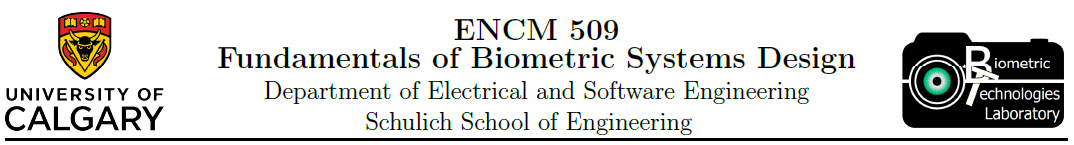

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

# Group 5 Lab Report 2

### Introduction

**The main purpose of this lab is to become acquainted with signature data acquisition and statistical analysis. We met during the lab 2 session and collected 30 sample of Ahmed's (genuine) signature of the word "Gerrard". Then we collected 30 samples of Ali's (imposter) signature of the same word "Gerrard". We will be using the prerecorded signature samples of the word "biometrics" as our other word signature.**

**Specific Questions** (See the handout PDF for details)

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

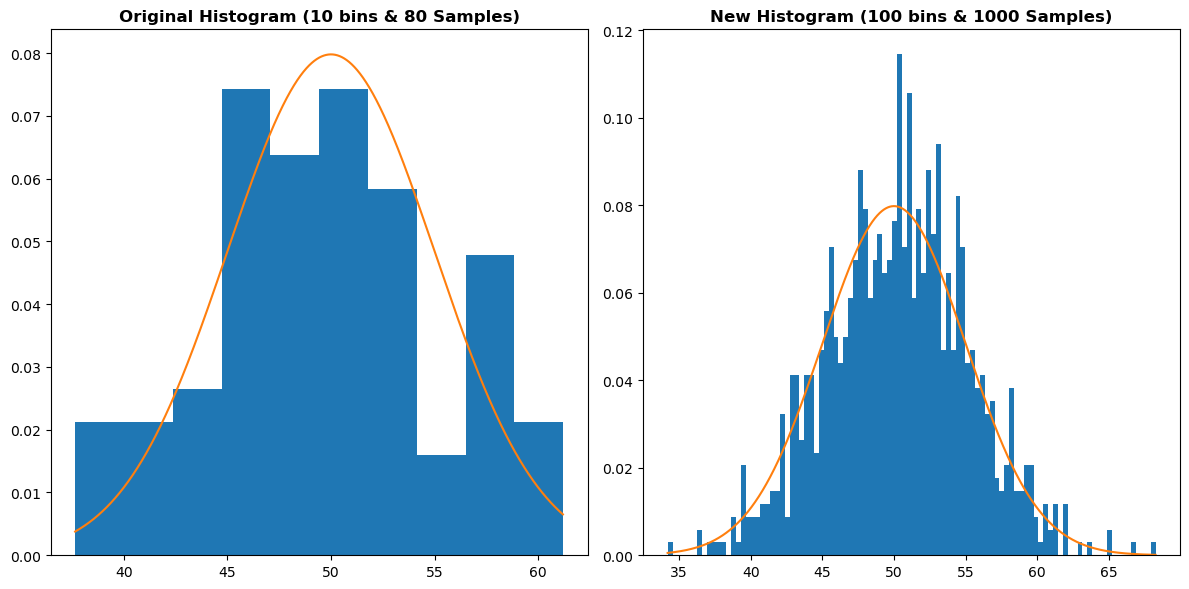

Original REAL mean: 49.78; std: 5.51
New REAL mean: 50.27; std: 4.93


In [2]:
mu = 50
std = 5
qtt_samples_orig = 80 # Original sample size
qtt_samples_new = 1000 # New sample size

pop_norm_orig = norm.rvs(mu, std, size=qtt_samples_orig) # Original Data
pop_norm_new = norm.rvs(mu, std, size=qtt_samples_new) # New Data

# Create x values for the normal distribution line plot
x_orig = np.arange(min(pop_norm_orig), max(pop_norm_orig), 0.01)
x_new = np.arange(min(pop_norm_new), max(pop_norm_new), 0.01)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.hist(pop_norm_orig, bins=10, density=True) # Original Plot
plt.plot(x_orig, norm.pdf(x_orig, mu, std))
plt.title("Original Histogram (10 bins & 80 Samples)", fontweight="bold")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.hist(pop_norm_new, bins=100, density=True) # New Plot
plt.plot(x_new, norm.pdf(x_new, mu, std))
plt.title("New Histogram (100 bins & 1000 Samples)", fontweight="bold")

plt.show()
print('Original REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm_orig), np.std(pop_norm_orig)))
print('New REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm_new), np.std(pop_norm_new)))

**We can see that using more samples increases the accuracy of the data, the mean and standard deviation for the dataset with more samples is closer to the true value of the mean (50) and standard deviation (5).**

**Furthermore, using more bins increases the resolution of the plot such that the histogram resembles the true normal distribution curve more**

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided. Plot the signature in 2D with the color representing the pressure on each point. Similarly to calculation of the mean and std of the random data, calculate the mean and std of the pressure for one signature, and plot the Normal distribution.

            X           Y  Pressure  Time
0  250.835963  169.266280  0.046642     0
1  250.835963  169.266280  0.186569     1
2  250.835963  169.266280  0.201954    15
3  250.835963  169.266280  0.222955    16
4  248.632771  161.171306  0.270574    31


C:\Users\ahmad\AppData\Local\Temp\ipykernel_172468\923265595.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pressuremap = cm.get_cmap("jet", np.max(prs1)+1)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_172468\923265595.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


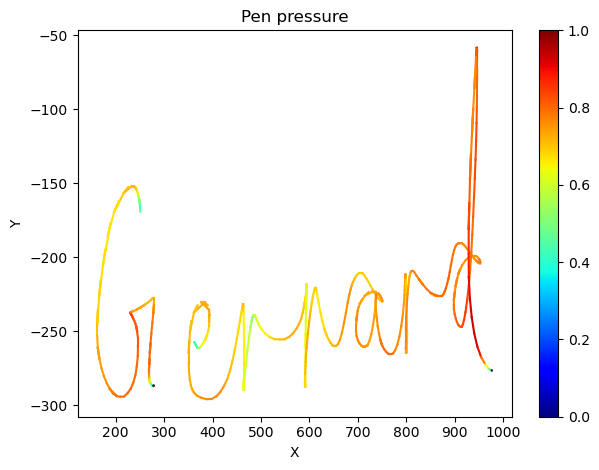

REAL mean: 183.77 std: 26.90


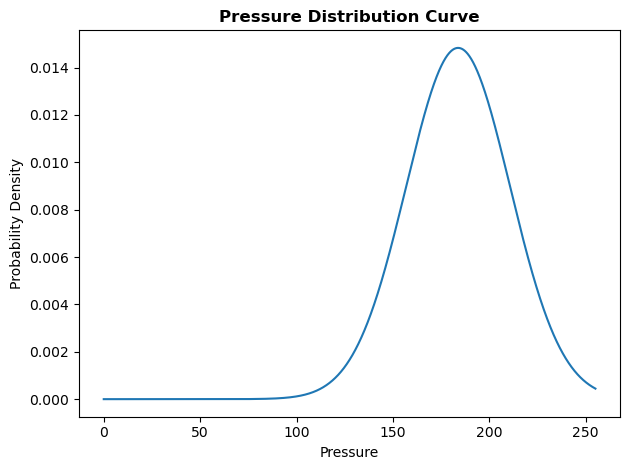

In [3]:
data_dir = "signatures/genuine/"

csv_file = pd.read_csv(data_dir + "1.csv")
# show the first lines of the data loaded
# the file contains 4 columns : [X, Y, Time , Pressure ]
print(csv_file.head())

# splitting the original data/ matrix into 3 variables
coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

# to correctly map the pressure into the colormap the normalization is required
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)
pressuremap = cm.get_cmap("jet", np.max(prs1)+1)

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
plt.show()

mean = np.mean(prs1)
std = np.std(prs1)
print("REAL mean: %.2f std: %.2f" % (mean, std))

x = np.arange(0, 255, 0.01)
x_pdf = norm.pdf(x, mean, std)

plt.plot(x, x_pdf)
plt.title("Pressure Distribution Curve", fontweight="bold")
plt.xlabel("Pressure")
plt.ylabel("Probability Density")
plt.show()

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. 
    - Explain why it is necessary.
    - Plot in 3D, where the third coordinate represents pressure.

**The machine may not recognize some fast movements which may end up recording distance changes but not the time change, and since dividing by zero would lead to an error we need to make sure we are not doing that by setting the time_diff to 0.0001**

C:\Users\ahmad\AppData\Local\Temp\ipykernel_172468\2079315756.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  velmap = cm.get_cmap("jet", np.max(vel)+1)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_172468\2079315756.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


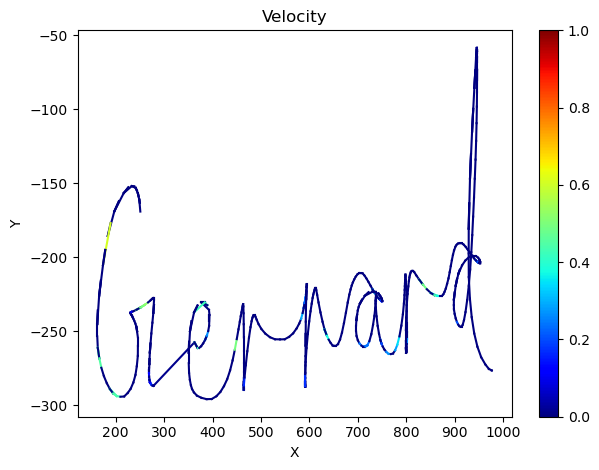

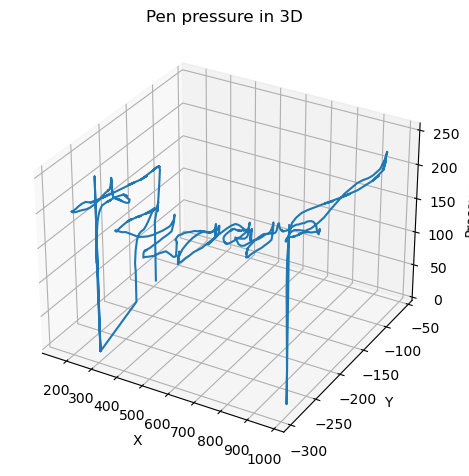

In [4]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))
    
    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 + (coords[i+1,1] - coords[i,1])**2)
        # if too fast time diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
    vel = np. insert (vel , 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel. astype (int)
    return vel

vel = calc_velocity(time1, coord1)

velmap = cm.get_cmap("jet", np.max(vel)+1)
for i in range(len(vel)-1):
    c = velmap(vel[i])
    time_diff = time1[i+1] - time1[i]
    im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
    plt.title ("Velocity")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Velocity')
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
plt.show()

ax = plt.axes(projection='3d')
# the line below is to reshape to vector using . flatten method
ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D')
plt.show()

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [5]:
data_dir = "signatures/genuine/"

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
        (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.36; velocity: 21.40
#1 - pressure: 0.40; velocity: 15.81
#2 - pressure: 0.39; velocity: 14.43
#3 - pressure: 0.37; velocity: 13.44
#4 - pressure: 0.37; velocity: 16.35
#5 - pressure: 0.37; velocity: 19.92
#6 - pressure: 0.35; velocity: 15.10
#7 - pressure: 0.36; velocity: 14.53
#8 - pressure: 0.39; velocity: 21.42
#9 - pressure: 0.37; velocity: 18.88
#10 - pressure: 0.36; velocity: 16.87
#11 - pressure: 0.36; velocity: 19.51
#12 - pressure: 0.34; velocity: 17.10
#13 - pressure: 0.34; velocity: 16.63
#14 - pressure: 0.34; velocity: 14.53
#15 - pressure: 0.34; velocity: 19.33
#16 - pressure: 0.36; velocity: 20.08
#17 - pressure: 0.32; velocity: 15.55
#18 - pressure: 0.37; velocity: 21.07
#19 - pressure: 0.34; velocity: 21.23
#20 - pressure: 0.30; velocity: 17.17
#21 - pressure: 0.32; velocity: 24.06
#22 - pressure: 0.31; velocity: 22.10
#23 - pressure: 0.34; velocity: 18.19
#24 - pressure: 0.32; velocity: 25.24
#25 - pressure: 0.29; velocity: 14.33
#26 - pressure: 0.20; 

## Genuine Presure Normal Distribution

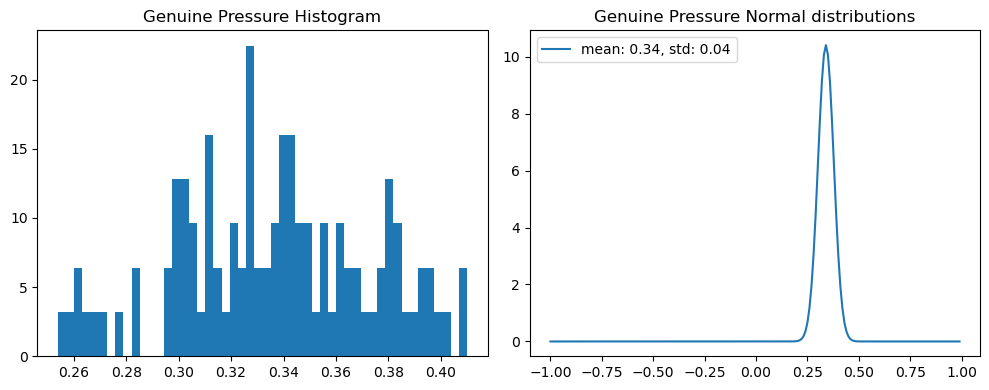

In [6]:
mu_prs, std_prs = np.mean(stats_measures[:,2]), np.std(stats_measures[:,2])

pop_norm2 = norm.rvs(mu_prs, std_prs, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm2, bins=50, density=True)
plt.title('Genuine Pressure Histogram')

plt.subplot(1,2,2)
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu_prs, scale=std_prs))
plt.legend(['mean: %.2f, std: %.2f' % (mu_prs, std_prs)])
plt.title('Genuine Pressure Normal distributions');


## Genuine Velocity Normal Distribution

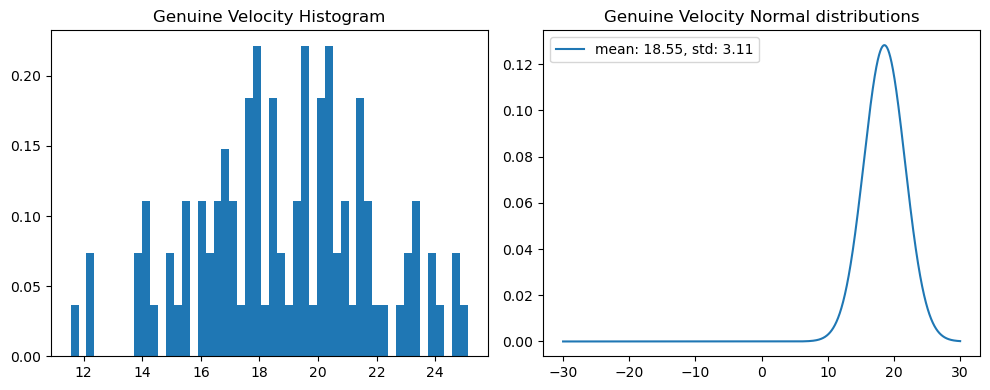

In [7]:
mu_vel, std_vel = np.mean(stats_measures[:,0]), np.std(stats_measures[:,0])

pop_norm1 = norm.rvs(mu_vel, std_vel, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True)
plt.title('Genuine Velocity Histogram')

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu_vel, scale=std_vel))
plt.legend(['mean: %.2f, std: %.2f' % (mu_vel, std_vel)])
plt.title('Genuine Velocity Normal distributions');

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [8]:
data_dir = "signatures/imposter/"

# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures_impostor = np.zeros((30,4))

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures_impostor[i, 0] = np.mean(vel)
    stats_measures_impostor[i, 1] = np.std(vel)
    
    stats_measures_impostor[i, 2] = np.mean(prs1)
    stats_measures_impostor[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
        (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.27; velocity: 17.13
#1 - pressure: 0.31; velocity: 11.87
#2 - pressure: 0.26; velocity: 44.99
#3 - pressure: 0.26; velocity: 23.85
#4 - pressure: 0.27; velocity: 23.25
#5 - pressure: 0.26; velocity: 39.06
#6 - pressure: 0.31; velocity: 20.12
#7 - pressure: 0.33; velocity: 18.79
#8 - pressure: 0.25; velocity: 37.11
#9 - pressure: 0.32; velocity: 35.13
#10 - pressure: 0.36; velocity: 40.45
#11 - pressure: 0.31; velocity: 36.99
#12 - pressure: 0.29; velocity: 40.29
#13 - pressure: 0.30; velocity: 39.09
#14 - pressure: 0.31; velocity: 20.12
#15 - pressure: 0.29; velocity: 25.14
#16 - pressure: 0.28; velocity: 33.65
#17 - pressure: 0.29; velocity: 22.14
#18 - pressure: 0.31; velocity: 27.75
#19 - pressure: 0.32; velocity: 34.13
#20 - pressure: 0.33; velocity: 34.09
#21 - pressure: 0.32; velocity: 20.99
#22 - pressure: 0.29; velocity: 39.12
#23 - pressure: 0.29; velocity: 33.03
#24 - pressure: 0.31; velocity: 37.50
#25 - pressure: 0.31; velocity: 30.94
#26 - pressure: 0.31; 

## Impostor Pressure Normal Distribution

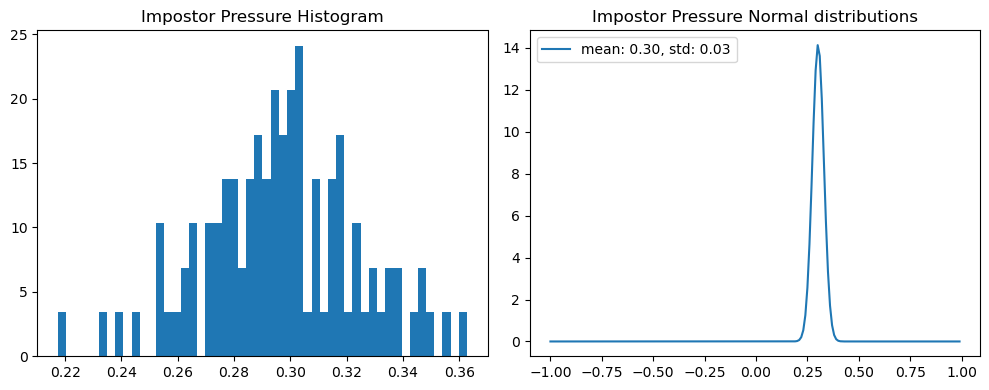

In [9]:
mu_prs_impostor, std_prs_impostor = np.mean(stats_measures_impostor[:,2]), np.std(stats_measures_impostor[:,2])

pop_norm2 = norm.rvs(mu_prs_impostor, std_prs_impostor, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm2, bins=50, density=True)
plt.title('Impostor Pressure Histogram')

plt.subplot(1,2,2)
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu_prs_impostor, scale=std_prs_impostor))
plt.legend(['mean: %.2f, std: %.2f' % (mu_prs_impostor, std_prs_impostor)])
plt.title('Impostor Pressure Normal distributions');

## Impostor Velocity Normal Distribution

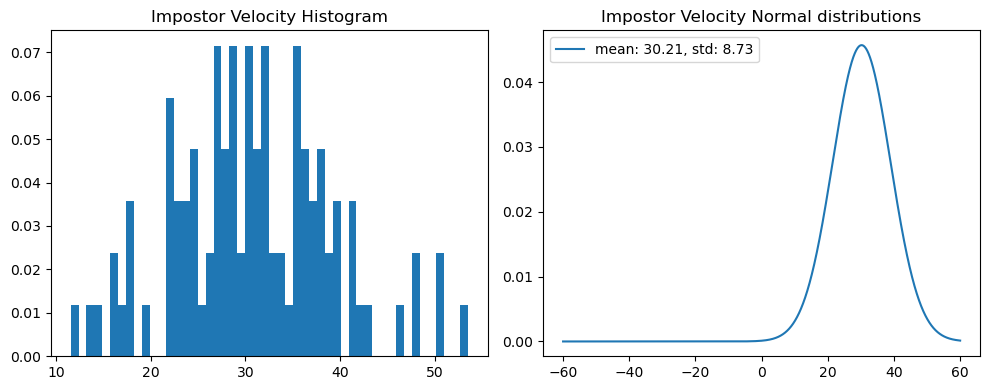

In [10]:
mu_vel_impostor, std_vel_impostor = np.mean(stats_measures_impostor[:,0]), np.std(stats_measures_impostor[:,0])

pop_norm1 = norm.rvs(mu_vel_impostor, std_vel_impostor, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True)
plt.title('Impostor Velocity Histogram')

plt.subplot(1,2,2)
x1 = np.arange(-60, 60, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu_vel_impostor, scale=std_vel_impostor))
plt.legend(['mean: %.2f, std: %.2f' % (mu_vel_impostor, std_vel_impostor)])
plt.title('Impostor Velocity Normal distributions');

## Comparing the Impostor and Genuine Distributions
**Looking at the genuine and impostor distributions, we see that there is an obvious difference in the person performing the signature. Especially when analyzing the velocity. The genuine velocity distribution had a mean of 18.55 and a standard deviation of 3.11 while the impostor velocity distribution has a mean of 30.21 and a standard deviation of 8.73. The genuine pressure mean is 0.34 and the genuine pressure standard deviation is 0.04 while the impostor pressure distribution mean 0.30 and the standard deviation is 0.03.**

## Conclusion
**In conclusion, we learned how to plot color maps, how to extract the velocity from the X and Y coordinates, how to plot 3D pressure plots, and analyze genuine and impostor signature data and compare the results.**